In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
from scipy.stats import linregress
from scipy.optimize import minimize

In [2]:
from IPython.core.display import HTML

# Center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Let's look at the evaporation test.

In [3]:
e_results = pd.read_excel('results.xlsx', sheet_name='evaporation', index_col=0)
e_results

,time,weight_difluid,weight_boat,temperature,rel_humidity,notes
id,,,,,,
1,13:11:00,23.45,6.722,26.0,40,NaN
2,13:22:00,23.47,6.674,26.0,40,NaN
3,13:45:00,23.44,6.569,26.0,40,NaN
4,14:02:00,23.42,6.490,26.0,40,NaN
5,14:16:00,23.41,6.418,26.0,40,NaN
6,14:31:00,23.41,6.350,26.0,40,NaN
7,14:46:00,23.40,6.280,26.0,40,NaN
8,15:01:00,23.40,6.218,26.0,40,NaN
9,15:16:00,23.38,6.152,26.5,40,NaN


Let's calculate percent change in weight.

In [4]:
# Parameters
difluid_empty = 23.33
boat_empty = 0.741

# Calculate weight of distilled water
e_results['weight_difluid_w'] = e_results['weight_difluid'] - difluid_empty
e_results['weight_boat_w'] = e_results['weight_boat'] - boat_empty

# Initial weight of distilled water
difluid_zero = e_results.loc[[1]]['weight_difluid_w'].values[0]
boat_zero = e_results.loc[[1]]['weight_boat_w'].values[0]

# Percent change in weight of distilled water
e_results['difluid_pct'] = (e_results['weight_difluid_w'] - difluid_zero) / difluid_zero
e_results['boat_pct'] = (e_results['weight_boat_w'] - boat_zero) / boat_zero

# Calculate time in seconds
dt = e_results['time'].apply(lambda t: datetime.combine(date(2022, 9, 4), t))
dt_zero = dt.values[0]
e_results['seconds'] = dt.apply(lambda t: (t - dt_zero).total_seconds())

e_results

,time,weight_difluid,weight_boat,temperature,rel_humidity,notes,weight_difluid_w,weight_boat_w,difluid_pct,boat_pct,seconds
id,,,,,,,,,,,
1,13:11:00,23.45,6.722,26.0,40,NaN,0.12,5.981,0.000000,0.000000,0.0
2,13:22:00,23.47,6.674,26.0,40,NaN,0.14,5.933,0.166667,-0.008025,660.0
3,13:45:00,23.44,6.569,26.0,40,NaN,0.11,5.828,-0.083333,-0.025581,2040.0
4,14:02:00,23.42,6.490,26.0,40,NaN,0.09,5.749,-0.250000,-0.038790,3060.0
5,14:16:00,23.41,6.418,26.0,40,NaN,0.08,5.677,-0.333333,-0.050828,3900.0
6,14:31:00,23.41,6.350,26.0,40,NaN,0.08,5.609,-0.333333,-0.062197,4800.0
7,14:46:00,23.40,6.280,26.0,40,NaN,0.07,5.539,-0.416667,-0.073901,5700.0
8,15:01:00,23.40,6.218,26.0,40,NaN,0.07,5.477,-0.416667,-0.084267,6600.0
9,15:16:00,23.38,6.152,26.5,40,NaN,0.05,5.411,-0.583333,-0.095302,7500.0


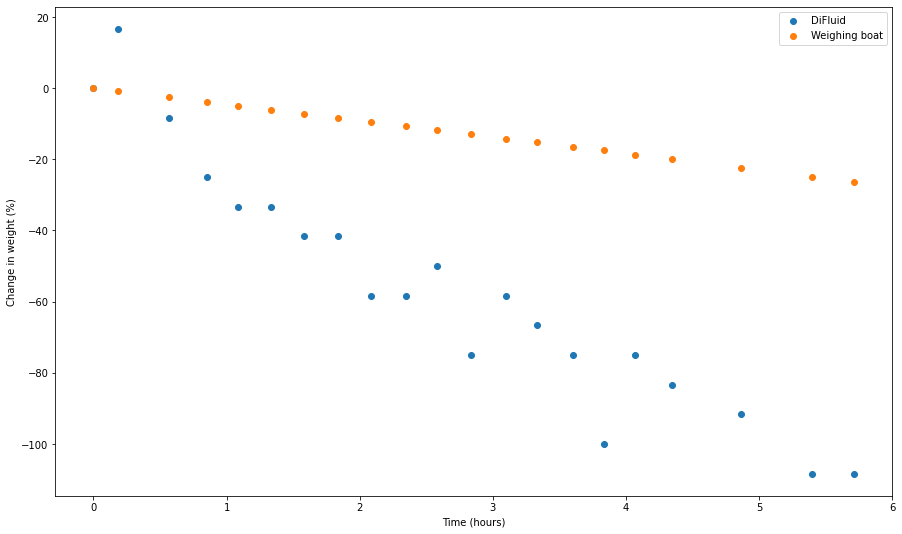

In [5]:
# Create the figure
fig, ax = plt.subplots(figsize=(15,9))
fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Change in weight (%)')

# Plot the residualstheta
ax.scatter(e_results['seconds'] / 3600, e_results['difluid_pct'] * 100., label='DiFluid')
ax.scatter(e_results['seconds'] / 3600, e_results['boat_pct'] * 100., label='Weighing boat')

# Add legend
ax.legend()

The evaporation rate is given by<sup>[1]</sup>:

$$
g_h = \theta A (x_s - x)
$$

We can simplify this as:

$$
g = k A
$$

where $k = \theta (x_s - x)$ is our model parameter. This gives us:

$$
kA = g = \frac{dV}{dt} = A \frac{dz}{dt} \Rightarrow k = \frac{dz}{dt}
$$

So for any shape, the rate of change of depth will be constant.

The DiFluid sample area can be described piecewise as:

* A truncated cone with radius r<sub>1</sub> on top, r<sub>2</sub> at the bottom, and height h<sub>1</sub>
* A cylinder below that with radius r<sub>2</sub> and height h<sub>2</sub>

For the top part, we can express volume as follows<sup>[2]</sup>:

$$
\begin{gather}
r(z) = r_1 + \frac{z}{h_1} (r_2 - r_1) \\
V_1(z) = \frac{1}{3} \pi z (r_1^2 + r_1 r(z) + r(z)^2)
\end{gather}
$$

For the bottom part, we have:

$$
V_2(z) = \pi (z - h_1) r_2^2
$$

Our data for the weighing boat should be a straight line, so let's start with a linear fit on that data.

In [6]:
res = linregress(e_results['seconds'], e_results['weight_boat_w'])
res

LinregressResult(slope=-7.644412522023215e-05, intercept=5.982728388644859, rvalue=-0.9999323452472354, pvalue=3.1941655618092156e-38, stderr=2.040109629051111e-07, intercept_stderr=0.0022880801707882265)

So we lose about 7.64 × 10<sup>-5</sup> g/s. Because water weighs about 1 g/ml, this is approximately 7.64 × 10<sup>-5</sup> ml/s, or 7.64 × 10<sup>-2</sup> mm<sup>3</sup>/s. The weighing boat has a diameter of 47.5 mm, which gives an area of 1772 mm<sup>2</sup>, so we are losing about about 4.31 × 10<sup>-5</sup> mm/s in terms of depth.

Measuring the DiFluid sample area with calipers, we get the following shape (dimensions in mm):

![title](difluid.png)

We can express the fluid volume as a function of the distance of the surface from the top of the sample area:

In [7]:
def difluid_volume(z):
    # From the diagram above
    r1 = 15/2
    r2 = 6/2

    # Initialize volume
    volume = 0
    
    # Handle the truncated cone
    if z < 2:
        r = r2 + ((2 - z) / 2) * (r1 - r2)
        volume += 1/3 * np.pi * (2 - z) * (r**2 + r * r2 + r2**2)
        z = 2
    
    # Handle the cylindrical part
    volume += np.pi * (3 - z) * r2**2
    
    # Return the total volume
    return volume

Let's plot this as a sanity check.

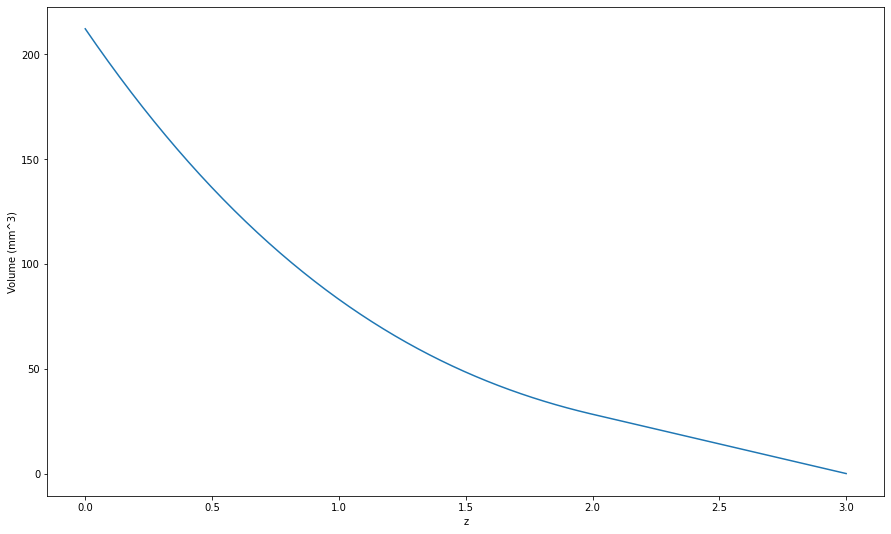

In [8]:
# Create the figure
fig, ax = plt.subplots(figsize=(15,9))
fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('z')
ax.set_ylabel('Volume (mm^3)')

# Plot the residuals
zs = np.linspace(0, 3, 200)
vs = np.array([difluid_volume(z) for z in zs])
ax.plot(zs, vs)

We want to express this in terms of time, rather than displacement. We use the following change of coordinates:

$$
z(t) = z_0 + k t
$$

where $z_0$ and $k$ are model parameters. Let's fit the DiFluid data to this model.

In [9]:
def err(theta, ts, vs):
    z0, k = theta
    zs_model = z0 + k * ts
    vs_model = np.array([difluid_volume(z) for z in zs_model])
    return np.sum((vs - vs_model)**2)

theta = np.array([0, 1e-5])
ts = e_results['seconds']
vs = e_results['weight_difluid_w'] * 1000

soln = minimize(err, theta, args=(ts, vs), method='Nelder-Mead')
print(soln)

 final_simplex: (array([[4.98190675e-01, 1.20347168e-04],
       [4.98125643e-01, 1.20353325e-04],
       [4.98127251e-01, 1.20360681e-04]]), array([2379.39257271, 2379.39258641, 2379.39262334]))
           fun: 2379.3925727139936
       message: 'Optimization terminated successfully.'
          nfev: 117
           nit: 62
        status: 0
       success: True
             x: array([4.98190675e-01, 1.20347168e-04])


This result tells us that the water was about 0.5 mm below the top of the sample area at the start, and went down at a rate of about 1.20 × 10<sup>-4</sup> mm/s. This is about twice as fast as what we got for the weighing boat. This could be because of differences in the air near the surface of the sample (e.g., if there is better circulation in the DiFluid sample area), or it could be because the meniscus effectively increases the surface area for a small surface like we have on the DiFluid. In either case, the values are in the same ballpark, as expected.

Let's plot the result.

Text(0.5, 1.0, 'Evaporation of 3 drops of distilled water in DiFluid (26 °C, 40% RH)')

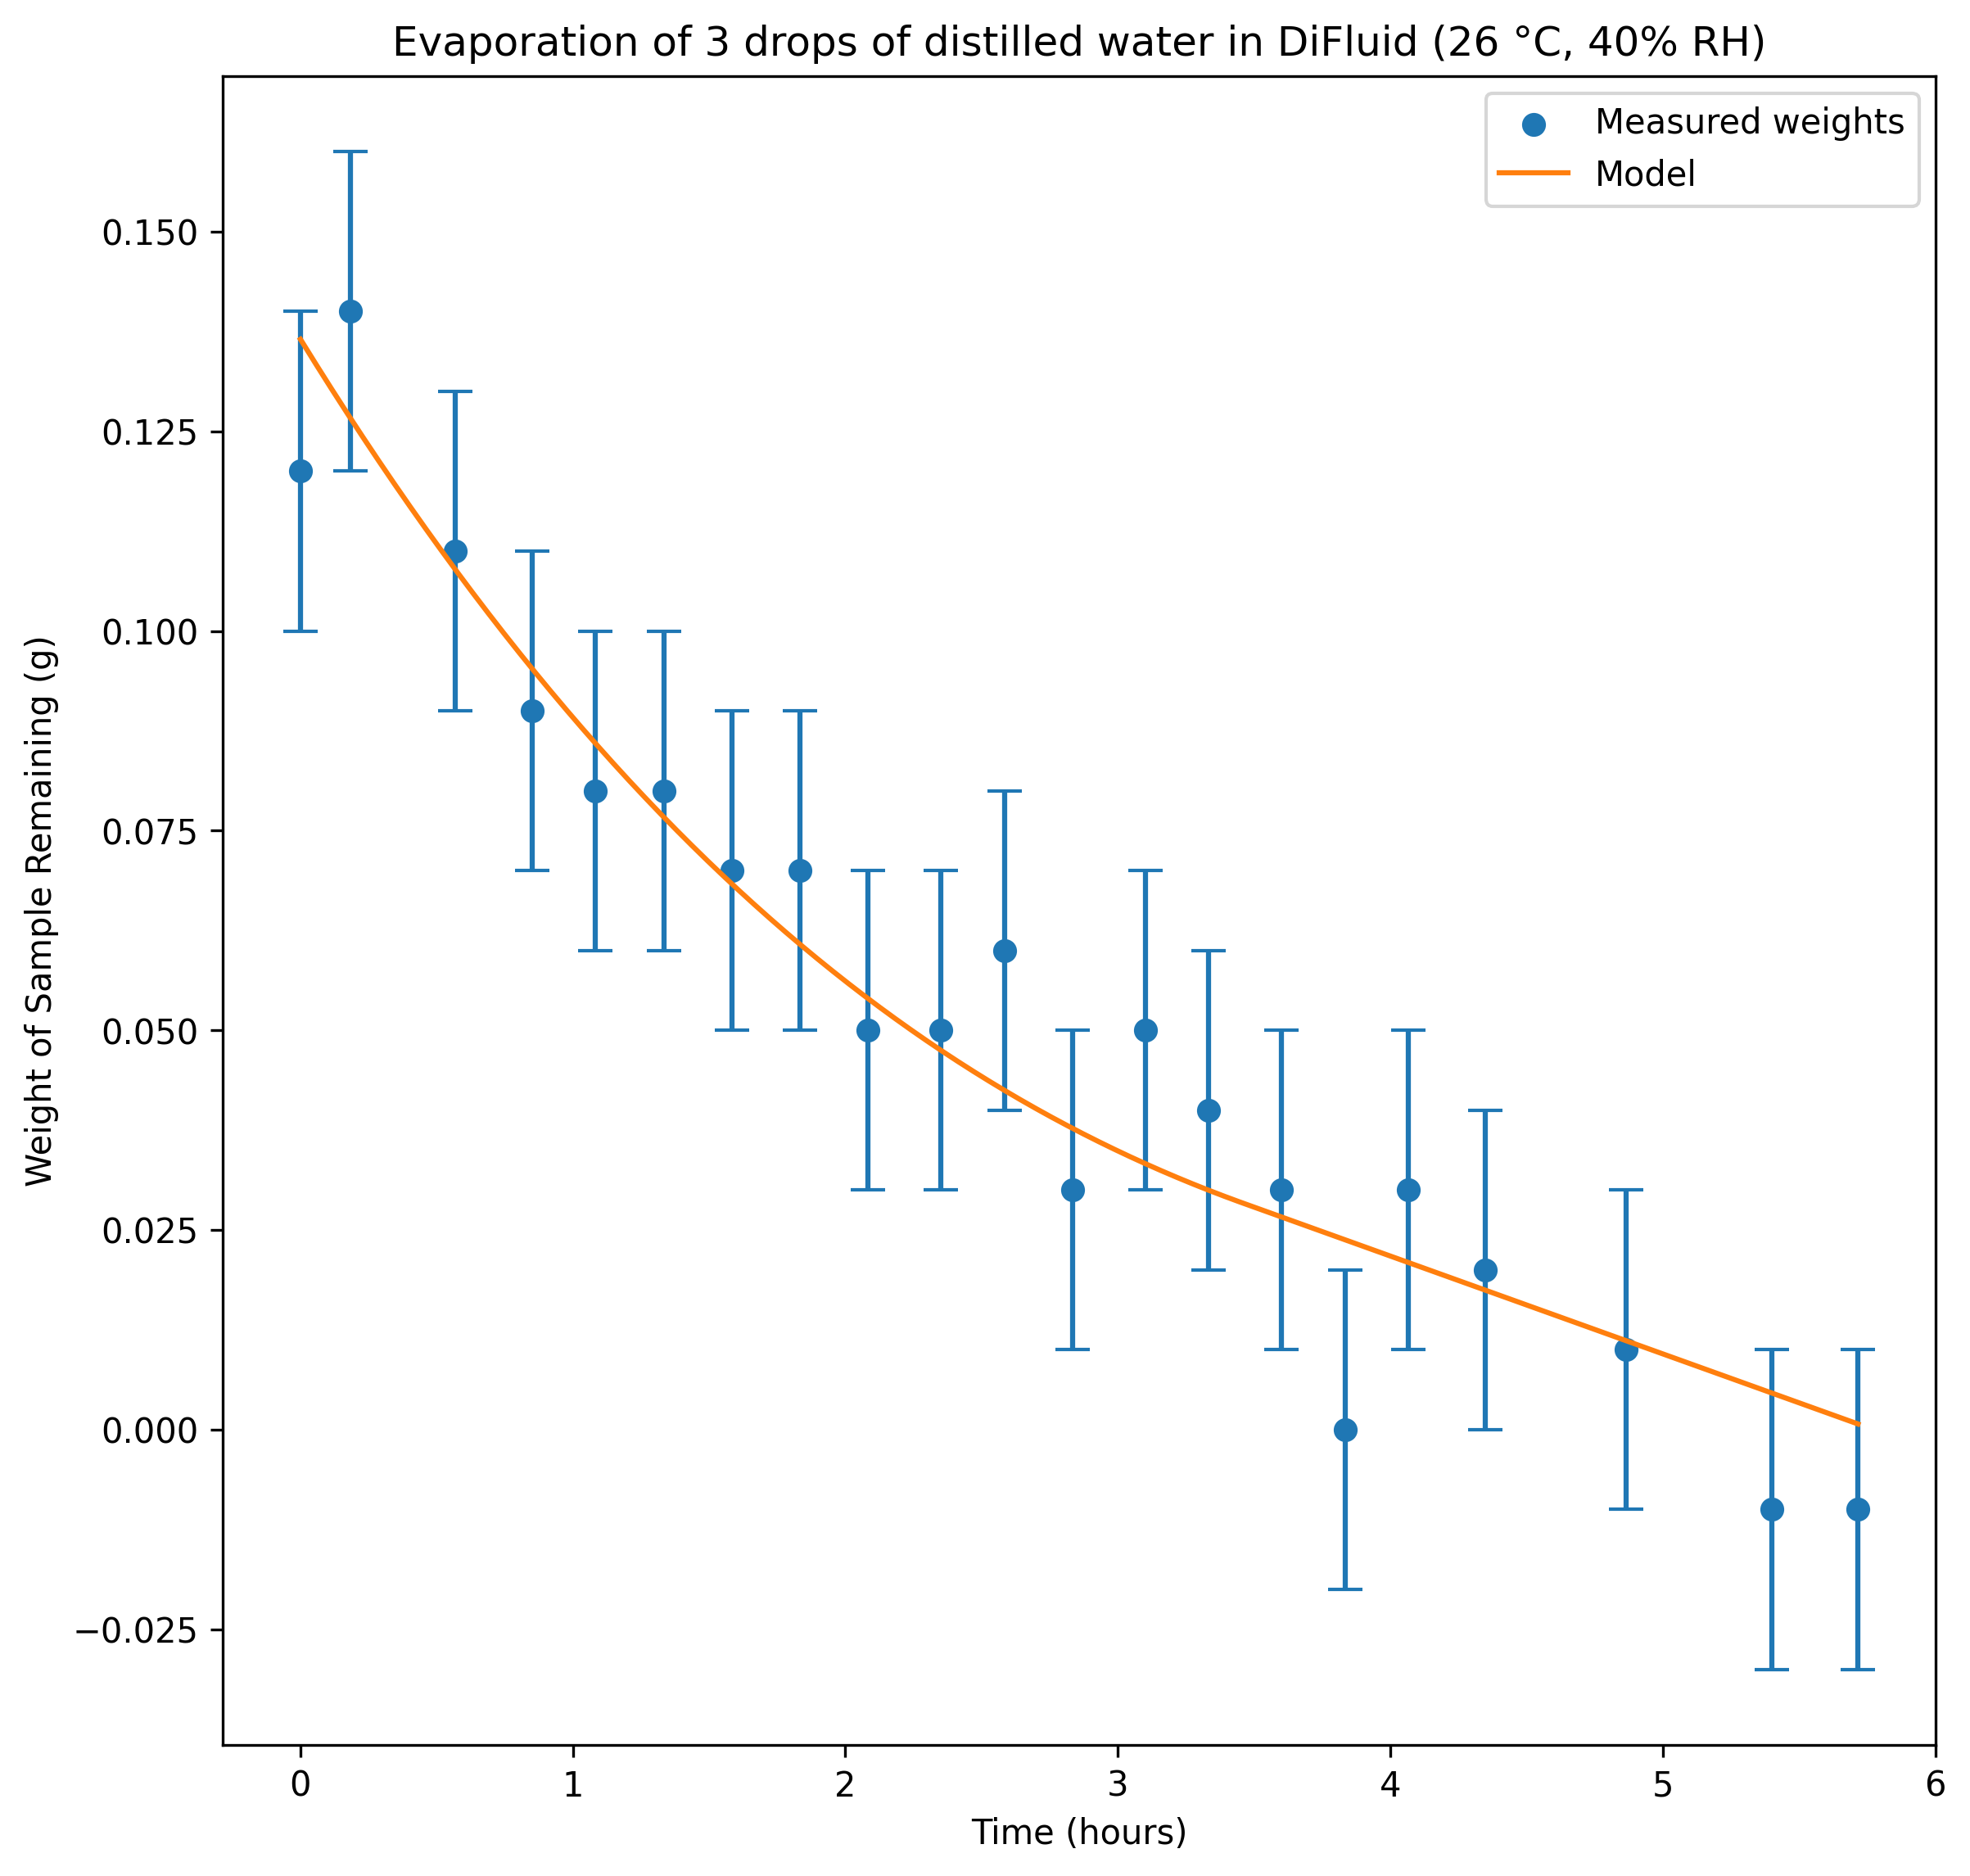

In [10]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9), dpi=300)
fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Weight of Sample Remaining (g)')

# Plot the data
ax.scatter(e_results['seconds'] / 3600, e_results['weight_difluid_w'], 
           label='Measured weights')

# Plot 0.02 g error bars
ax.errorbar(e_results['seconds'] / 3600, e_results['weight_difluid_w'], 
            yerr=0.02, capsize=5, ls='none')

# PLot the model
ts = np.linspace(e_results['seconds'].min(), e_results['seconds'].max(), 200)
z0, k = soln.x
zs_model = z0 + k * ts
vs_model = np.array([difluid_volume(z) for z in zs_model])
ax.plot(ts / 3600, vs_model / 1000, label='Model')

# Draw legend
ax.legend()

# Plot title
plt.title('Evaporation of 3 drops of distilled water in DiFluid (26 °C, 40% RH)')

If we assume dissolved solids don't change the volume of the liquid, we can estimate the effect evaporation would have on the TDS of a sample. The actual effect should be less than this, since adding dissolved solids to a liquid will reduce its evaporation rate<sup>[3]</sup>.

Let's consider two different cases: one where we start with 10% TDS, e.g., espresso; and one where we start with 1.5% TDS, which is more typical of filter coffee.

Text(0.5, 1.0, 'Estimated change in TDS due to evaporation')

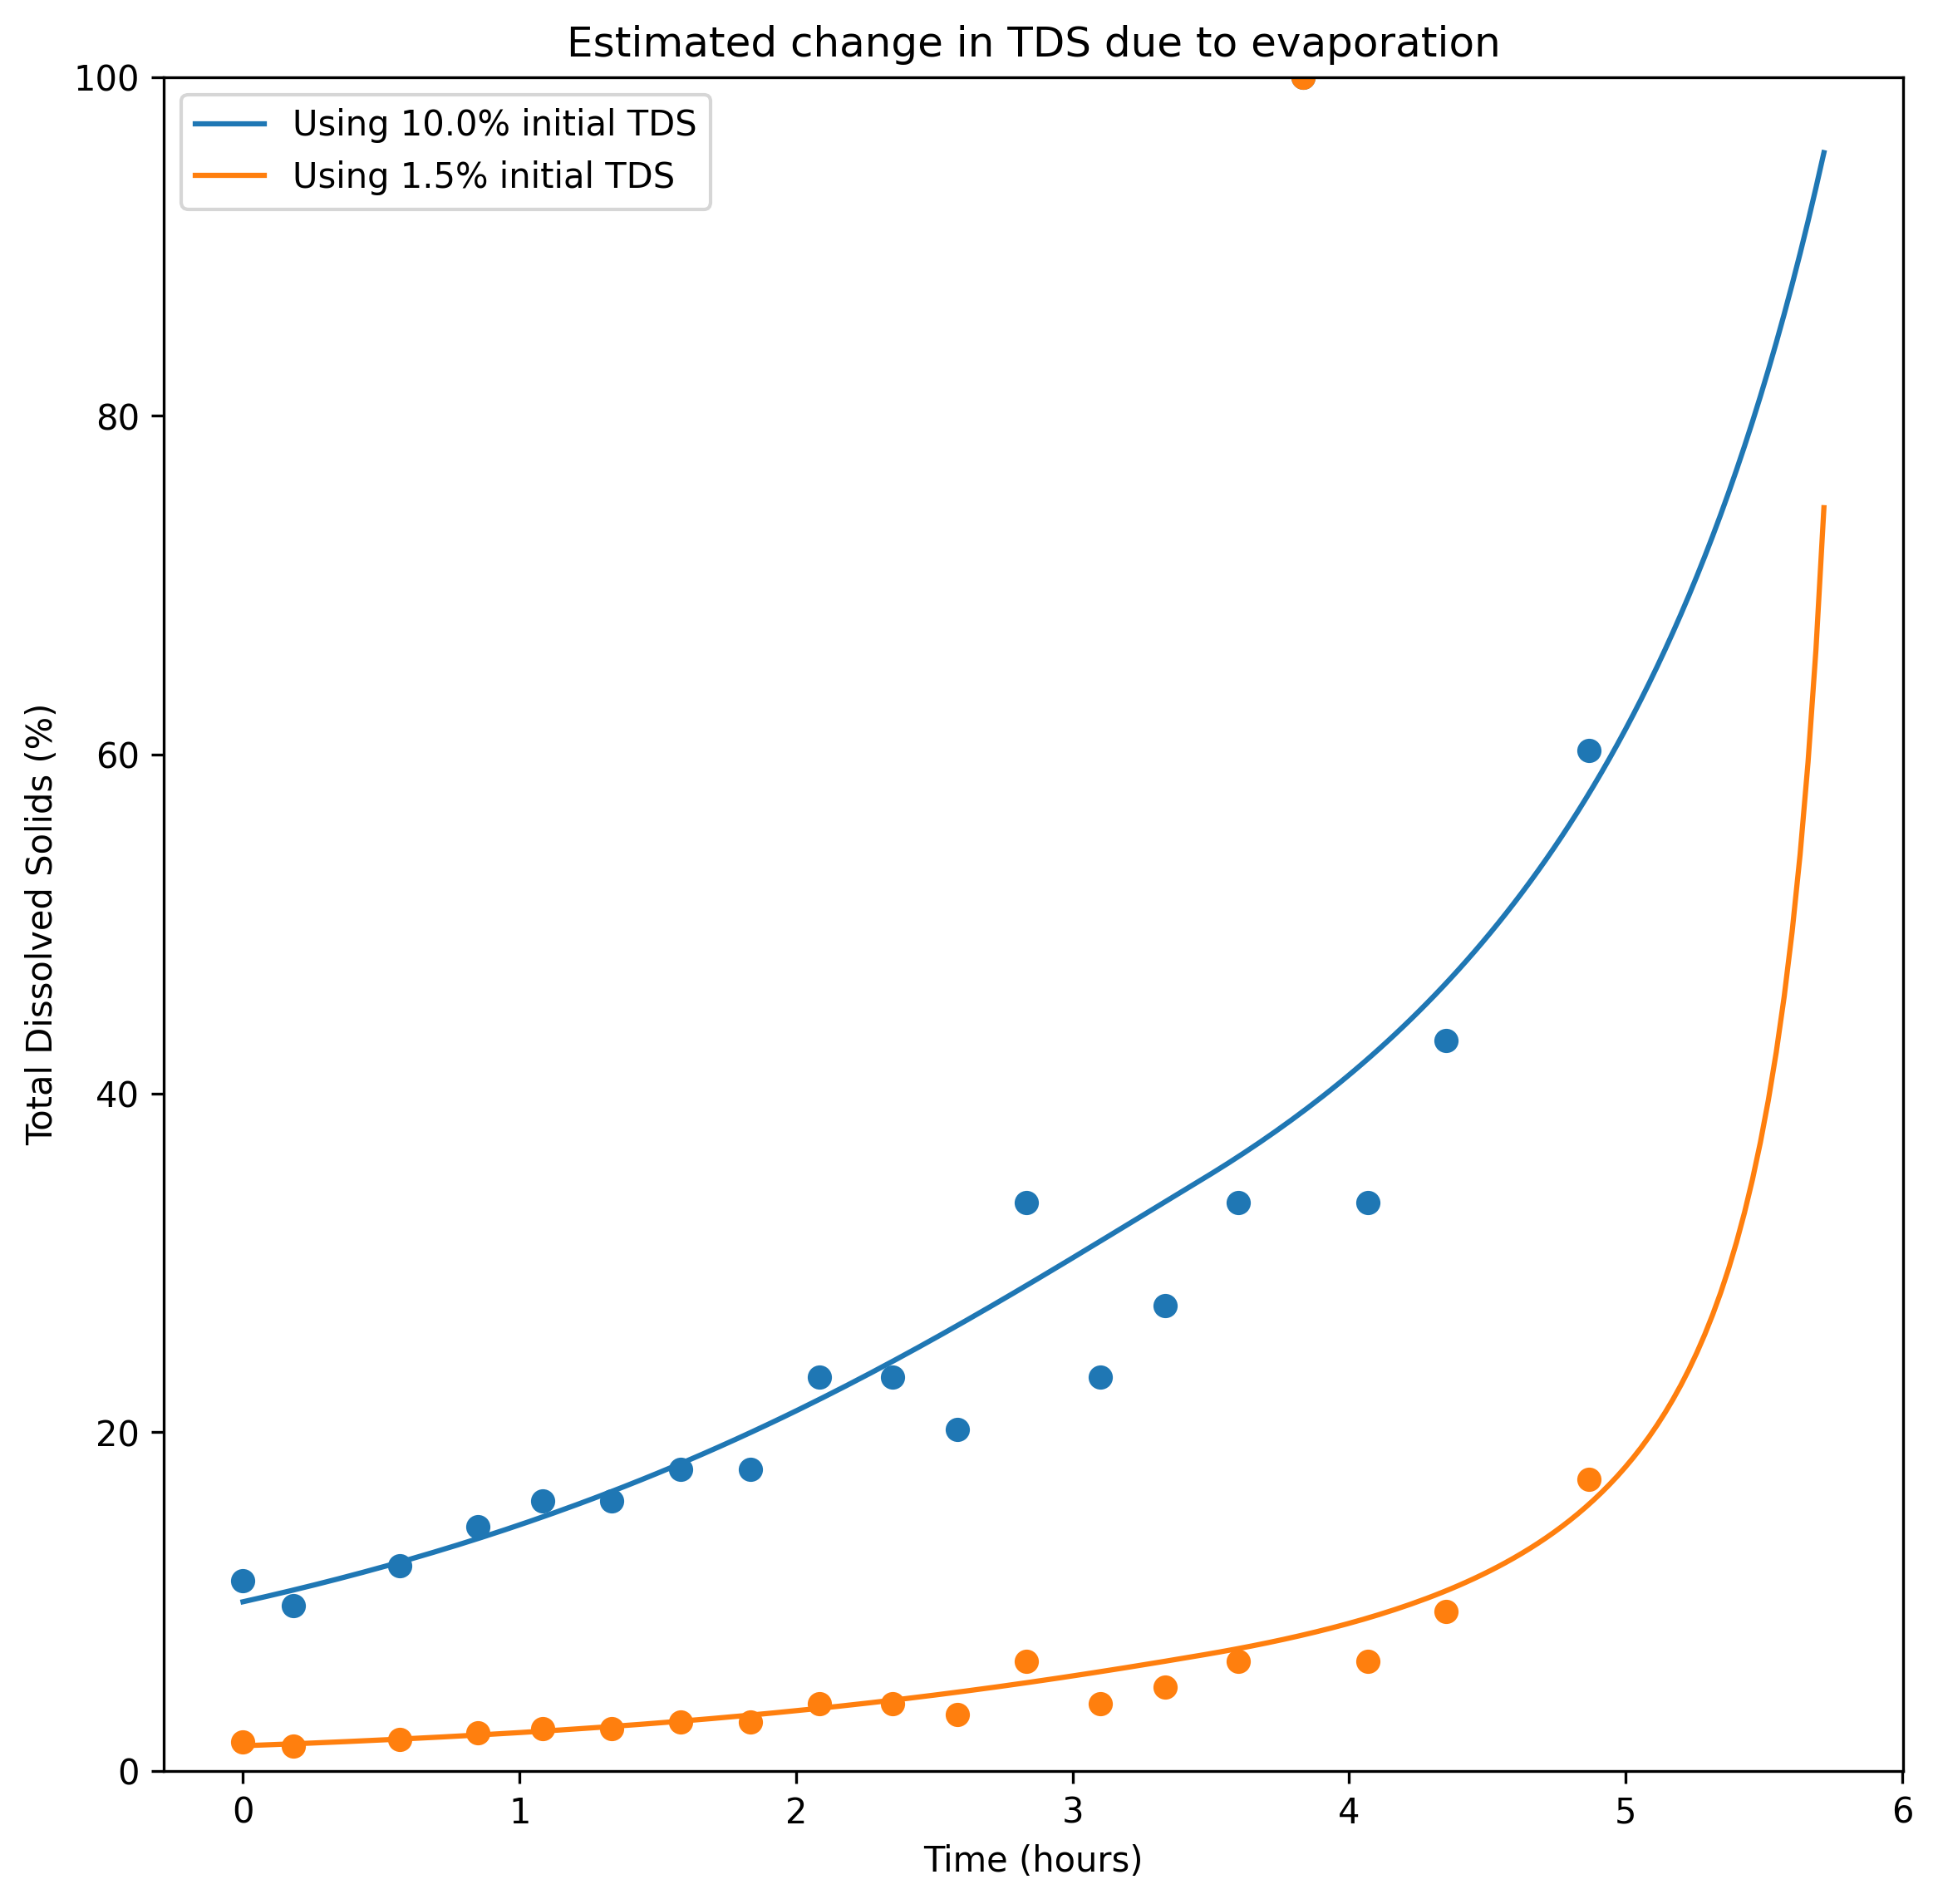

In [11]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9), dpi=300)
fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Total Dissolved Solids (%)')

# Get modeled data
ts = np.linspace(e_results['seconds'].min(), e_results['seconds'].max(), 200)
z0, k = soln.x
zs_model = z0 + k * ts
vs_model = np.array([difluid_volume(z) for z in zs_model])

# Calculate solid weights
tds_1 = 0.1
tds_2 = 0.015

#tds = solid_weight / (liquid_weight + solid_weight)
#tds * (liquid_weight + solid_weight) = solid_weight
#tds * liquid_weight = solid_weight (1 - tds)
#tds * liquid_weight / (1 - tds) = solid_weight

solid_weight_1 = tds_1 / (1 - tds_1) * vs_model[0] / 1000
solid_weight_2 = tds_2 / (1 - tds_2) * vs_model[0] / 1000

# Plot measured data
ax.scatter(e_results['seconds'] / 3600, 
           solid_weight_1 / (solid_weight_1 + e_results['weight_difluid_w']) * 100)
ax.scatter(e_results['seconds'] / 3600, 
           solid_weight_2 / (solid_weight_2 + e_results['weight_difluid_w']) * 100)

# Plot modeled data
ax.plot(ts / 3600, solid_weight_1 / (solid_weight_1 + vs_model / 1000) * 100, 
        label='Using 10.0% initial TDS')
ax.plot(ts / 3600, solid_weight_2 / (solid_weight_2 + vs_model / 1000) * 100, 
        label='Using 1.5% initial TDS')

# Set limits
ax.set_ylim(0, 100)

# Draw legend
ax.legend()

# Plot title
plt.title('Estimated change in TDS due to evaporation')

And zooming into the first 5 minutes:

Text(0.5, 1.0, 'Estimated change in TDS due to evaporation (detail)')

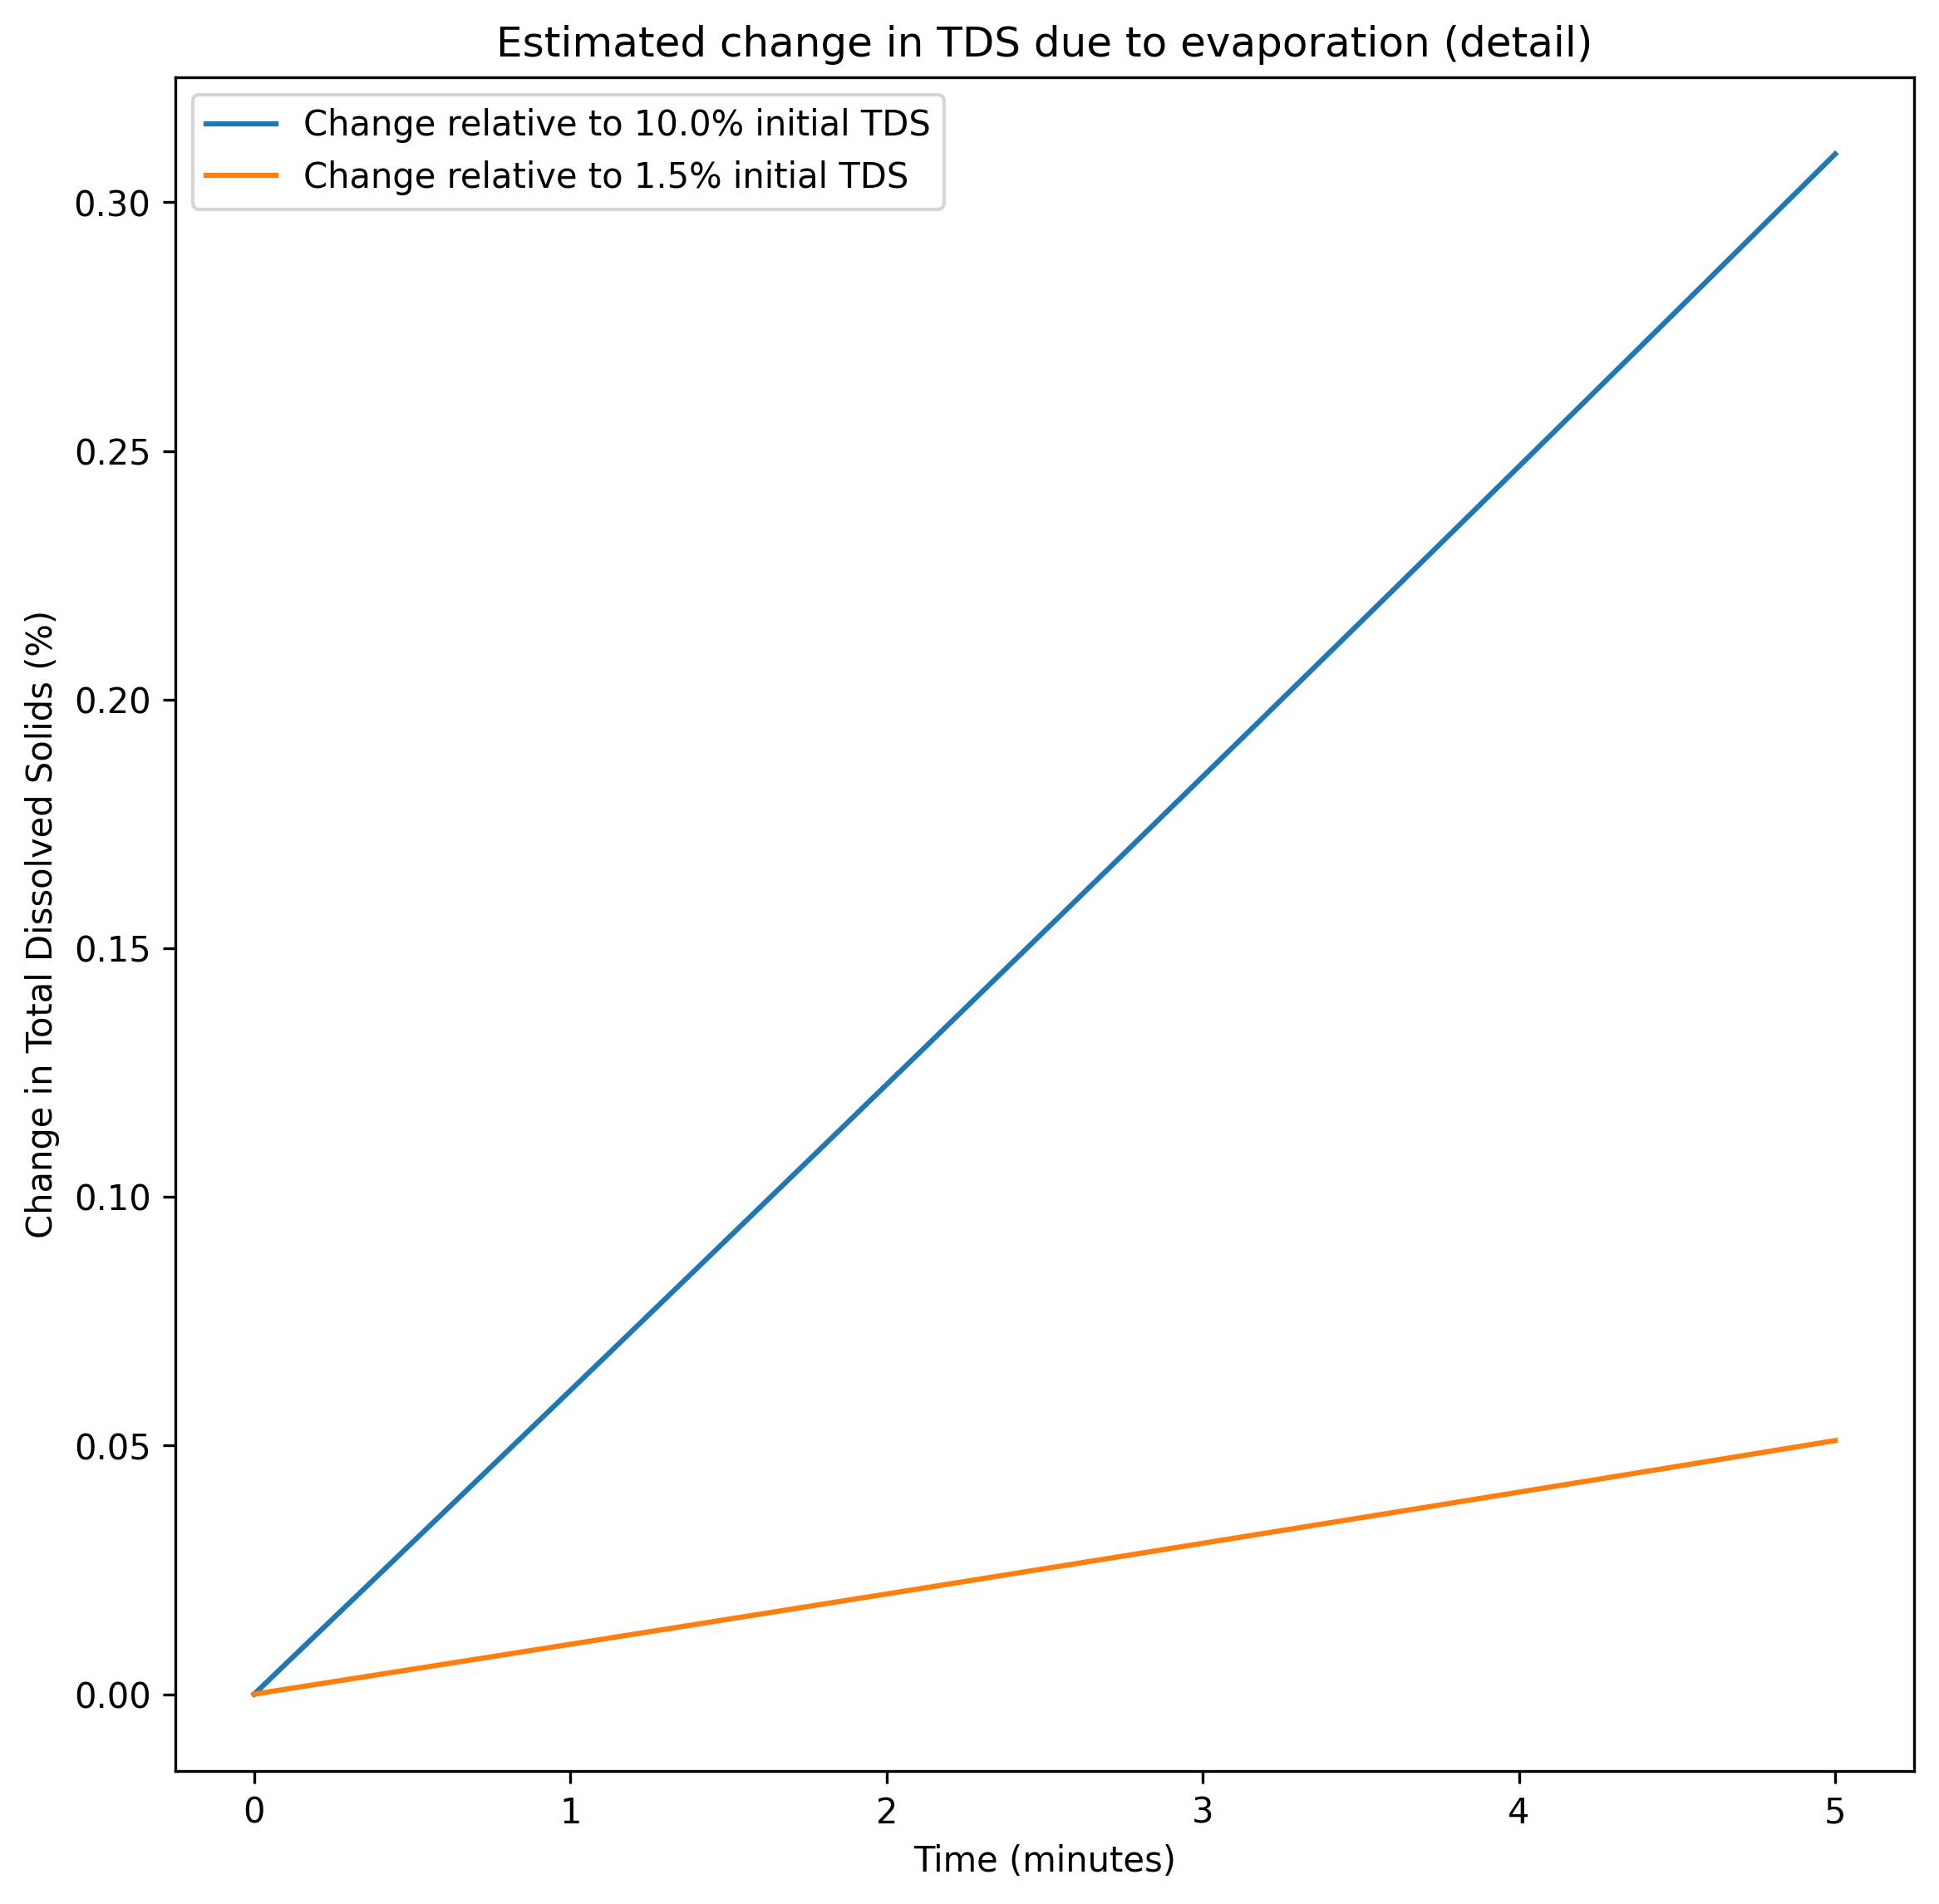

In [12]:
# Create the figure
fig, ax = plt.subplots(figsize=(9,9), dpi=300)
fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Change in Total Dissolved Solids (%)')

# Parameters
solid_weight_1 = tds_1 / (1 - tds_1) * vs_model[0] / 1000
solid_weight_2 = tds_2 / (1 - tds_2) * vs_model[0] / 1000

# Get modeled data
ts = np.linspace(0., 5 * 60, 200)
z0, k = soln.x
zs_model = z0 + k * ts
vs_model = np.array([difluid_volume(z) for z in zs_model])

# Plot modeled data
ax.plot(ts / 60, solid_weight_1 / (solid_weight_1 + vs_model / 1000) * 100 - 10, 
        label='Change relative to 10.0% initial TDS')
ax.plot(ts / 60, solid_weight_2 / (solid_weight_2 + vs_model / 1000) * 100 - 1.5, 
        label='Change relative to 1.5% initial TDS')

# Draw legend
ax.legend()

# Plot title
plt.title('Estimated change in TDS due to evaporation (detail)')

## References

[1] https://www.engineeringtoolbox.com/evaporation-water-surface-d_690.html \
[2] https://keisan.casio.com/exec/system/1223372110
[3] https://books.gw-project.org/a-conceptual-overview-of-surface-and-near-surface-brines-and-evaporite-minerals/part/evaporation/